# Project: Credit Card Fraud Detection EDA

1. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [47]:
# Setting visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

2. LOADING DATASET

In [17]:
# Download from: https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 3. DATA OVERVIEW

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
# Basic info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [28]:
print("--- Dataset Shape ---")
print(df.shape)
print("\n--- Missing Values ---")
print(df.isnull().sum().max())

--- Dataset Shape ---
(284807, 31)

--- Missing Values ---
0


In [78]:
# Class distribution
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


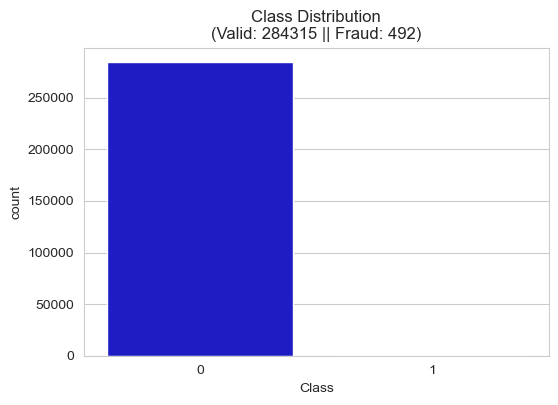

In [82]:
plt.figure(figsize=(6, 4))
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, hue='Class', palette=colors, legend=False)
plt.title(f'Class Distribution\n(Valid: {class_counts[0]} || Fraud: {class_counts[1]})', fontsize=12)
plt.show()

5. TRANSACTION AMOUNT ANALYSIS

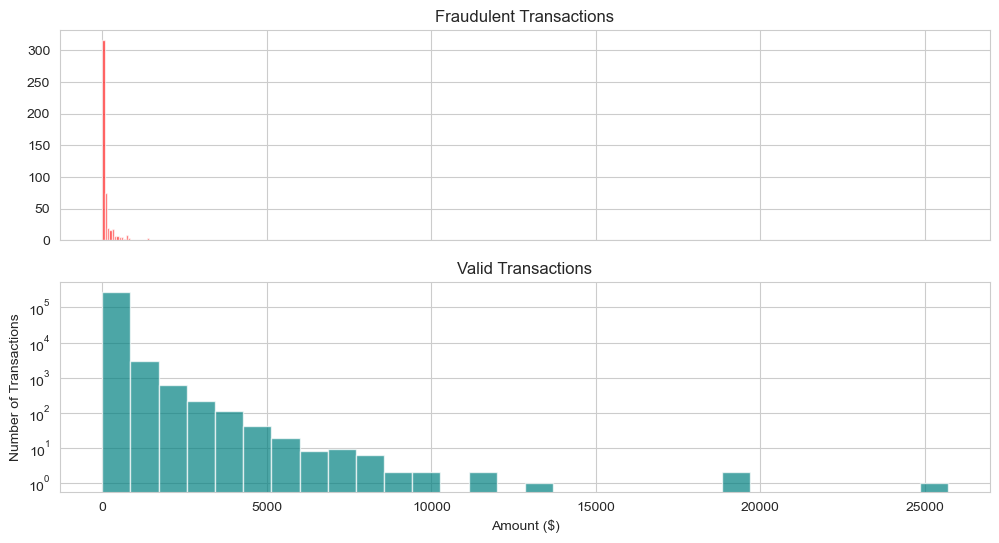

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))
ax1.hist(df.Amount[df.Class == 1], bins=30, color='red', alpha=0.7)
ax1.set_title('Fraudulent Transactions')
ax2.hist(df.Amount[df.Class == 0], bins=30, color='teal', alpha=0.7)
ax2.set_title('Valid Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log') # Log scale to see differences clearly
plt.show()

6. TIME DISTRIBUTION ANALYSIS

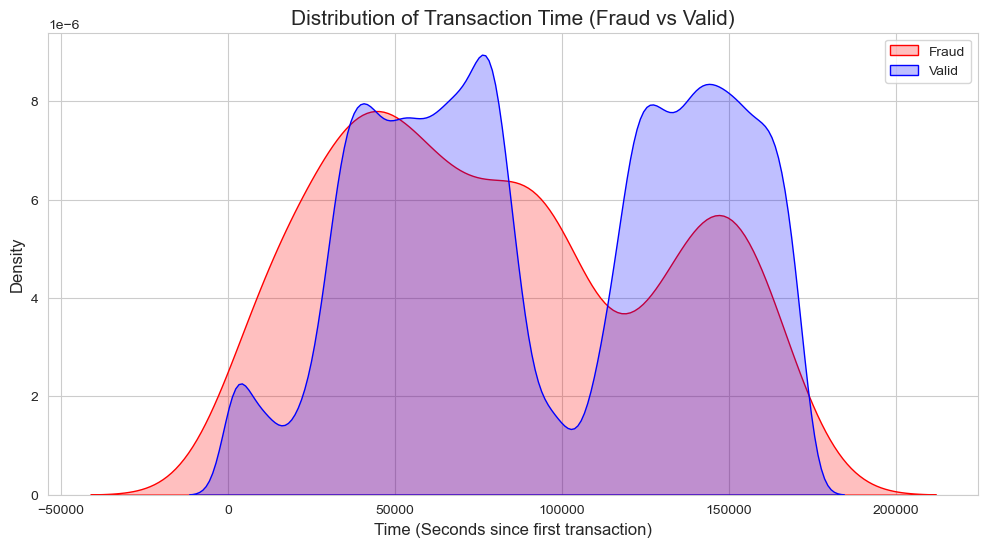

In [51]:
plt.figure(figsize=(12, 6))

# Using kdeplot for a smooth comparison of distributions
sns.kdeplot(df['Time'][df['Class'] == 1], color='red', label='Fraud', fill=True)
sns.kdeplot(df['Time'][df['Class'] == 0], color='blue', label='Valid', fill=True)

plt.title('Distribution of Transaction Time (Fraud vs Valid)', fontsize=15)
plt.xlabel('Time (Seconds since first transaction)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right')

plt.show()

7. FEATURE CORRELATION HEATMAP

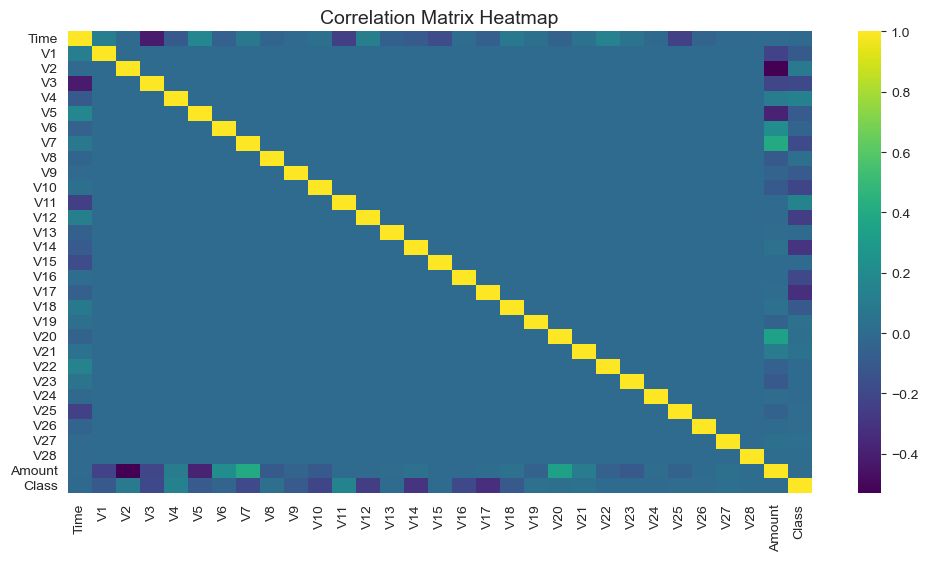

In [69]:
# We use a subsample for the heatmap to avoid noise
plt.figure(figsize=(12,6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='viridis', annot_kws={'size':20})
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()

8. BOXPLOT OF IMPORTANT FEATURES

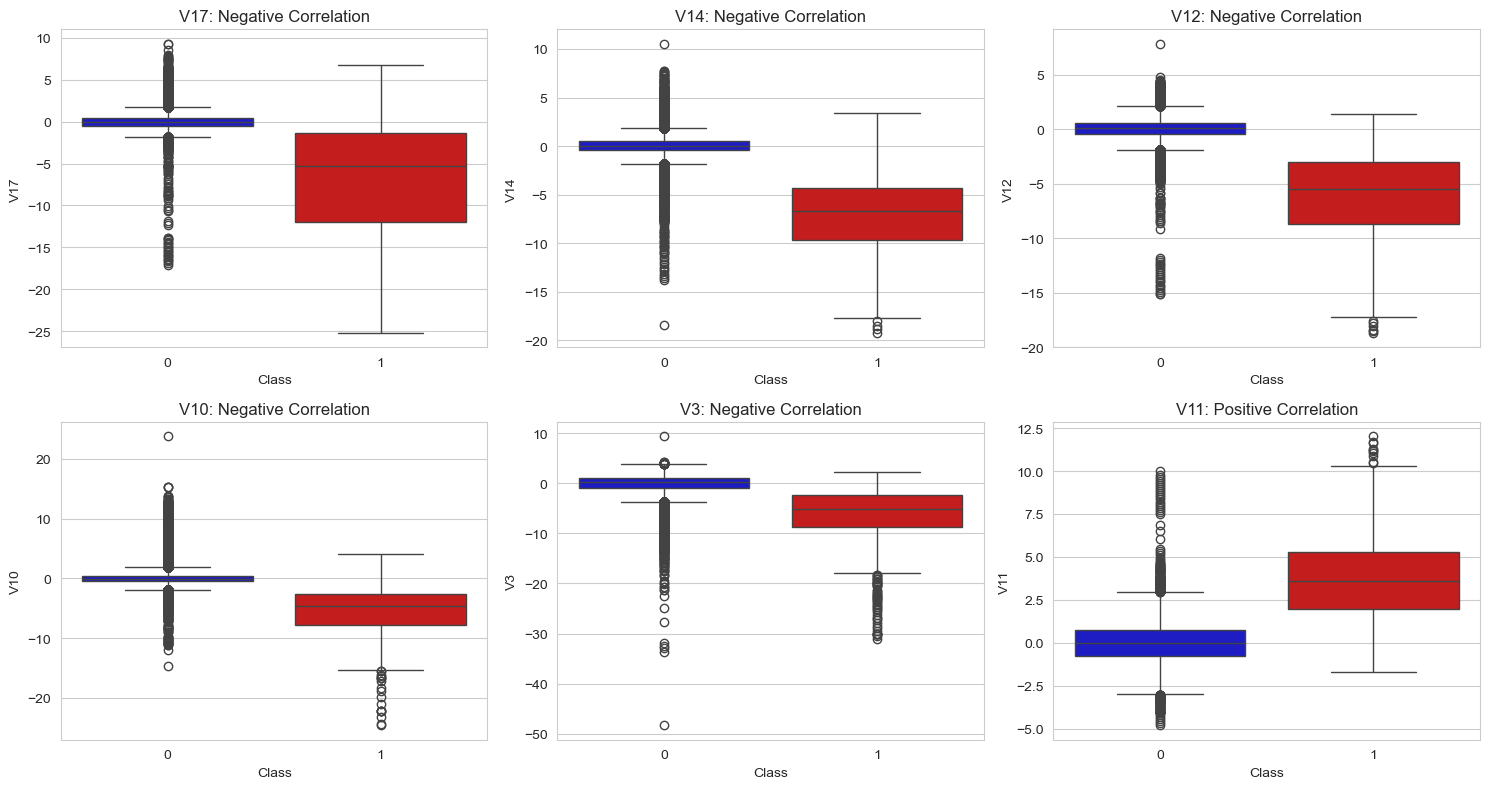

In [90]:
# This shows the most important PCA features identified in the heatmap
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Top Row: Negative Correlations
sns.boxplot(x="Class", y="V17", data=df, hue="Class", palette=my_colors, ax=axes[0,0], legend=False)
axes[0,0].set_title('V17: Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df, hue="Class", palette=my_colors, ax=axes[0,1], legend=False)
axes[0,1].set_title('V14: Negative Correlation')

sns.boxplot(x="Class", y="V12", data=df, hue="Class", palette=my_colors, ax=axes[0,2], legend=False)
axes[0,2].set_title('V12: Negative Correlation')

# Bottom Row: Added V10, V3 and Positive Correlation V11
sns.boxplot(x="Class", y="V10", data=df, hue="Class", palette=my_colors, ax=axes[1,0], legend=False)
axes[1,0].set_title('V10: Negative Correlation')

sns.boxplot(x="Class", y="V3", data=df, hue="Class", palette=my_colors, ax=axes[1,1], legend=False)
axes[1,1].set_title('V3: Negative Correlation')

sns.boxplot(x="Class", y="V11", data=df, hue="Class", palette=my_colors, ax=axes[1,2], legend=False)
axes[1,2].set_title('V11: Positive Correlation')

plt.tight_layout()
plt.show()

# END